### 

## Final Project
### TOPIC: Credit Card Fraud Detection 

#### Team Member:
1. TOM TITO
2. TEANG SREYROTH
3. SORPORN SOVORTEY
4. POM MOUYLANG
5. DIN PICH
6. VEASNA DARA

* Goal: Identify fraudulent transactions from credit card data using machine learning.
* Challenges:
    * Imbalanced dataset: Fraudulent transactions are much less frequent than genuine ones
    * Real-time prediction: Detection systems need to process transactions quickly.

### Table of Contents
1. Importing dependencies
2. Exploratory data analysis
3. Splitting the data into train & test data
4. Model building
    * a
    * b
    * c
    * d
    * e
5. Hyperparameter Tuning
6. Conclusion

## Libraries

In [1]:
import pandas as pd

## Data Preparation

In [2]:
# Load the dataset
data = pd.read_csv('../data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
pd.options.display.max_columns = None # To show all columns
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum().any()

False

In [8]:
data.duplicated().any()

True

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(283726, 31)

In [11]:
# Count of fraud (Class = 1) and non-fraud (Class = 0)
print(data['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

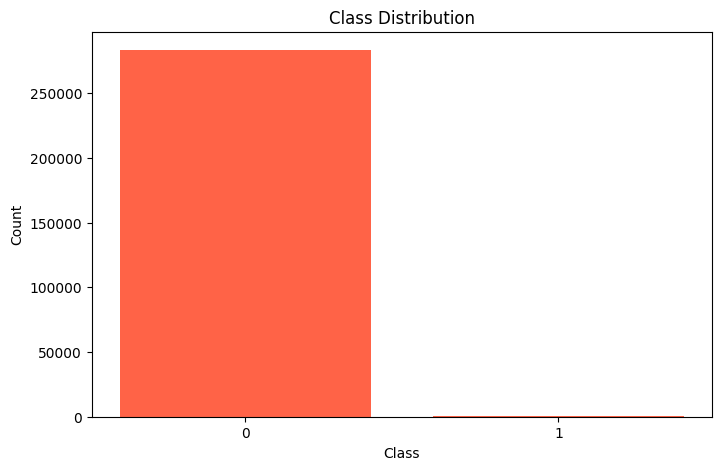

In [12]:
import matplotlib.pyplot as plt
class_counts = data['Class'].value_counts().sort_index()

# Plot using plt.bar
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(class_counts.index, class_counts.values, color='tomato')

# Customize labels and title
plt.xticks([0, 1], ['0', '1'])  # Set class labels on x-axis
plt.xlabel("Class")
plt.ylabel("Count") 
plt.title("Class Distribution")

### Normalize / Scale Data for feature Amount and Time

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

In [14]:
print(f'Amount after scaled:\n{data['Amount'].head()}')
print(f'Time after scaled:\n{data['Time'].head()}')

Amount after scaled:
0    0.244200
1   -0.342584
2    1.158900
3    0.139886
4   -0.073813
Name: Amount, dtype: float64
Time after scaled:
0   -1.996823
1   -1.996823
2   -1.996802
3   -1.996802
4   -1.996781
Name: Time, dtype: float64


### Handle Class Imbalance
    1. SMOTE (Synthetic Minority Oversampling Technique)
        * Generate synthetic samples for the monitority class
    2. Undersampling
        * Reduce the size of the majority class
    3. class weighting
        * Use class weights during model training

In [15]:
# Oversampling
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Original dataset shape: {X.shape}')
print(f"Resampled dataset shape: {X_resampled.shape}")

Original dataset shape: (283726, 30)
Resampled dataset shape: (566506, 30)


In [16]:
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [17]:
# Save processed data
path = '../data/oversampling_data.csv'
processed_data = pd.concat([X_resampled, y_resampled], axis=1)
processed_data.to_csv(path, index=False)
print("Processed data saved!")

Processed data saved!


### Exploratory Data Analysis (EDA)

* Analyze the Target Variable: Understand the distribution of `class` (fraud vs non-fraud)

In [18]:
df = pd.read_csv('../data/oversampling_data.csv')

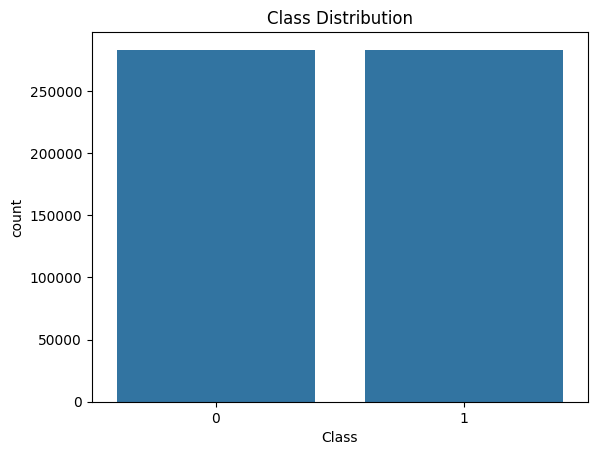

Class Distributiion Percentage:
 Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [19]:
import seaborn as sns

# Countplot for class distribution
sns.countplot(x='Class', data=processed_data)
plt.title('Class Distribution')
plt.show()

# Calculate percentages
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print('Class Distributiion Percentage:\n', fraud_percentage)

* Explore Key Features: Analyze the `Amount` and `Time` features

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


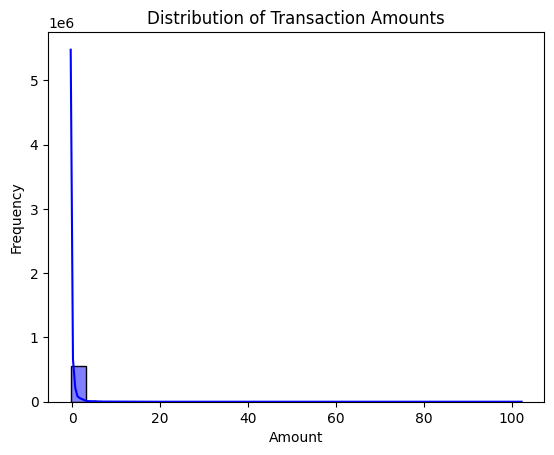

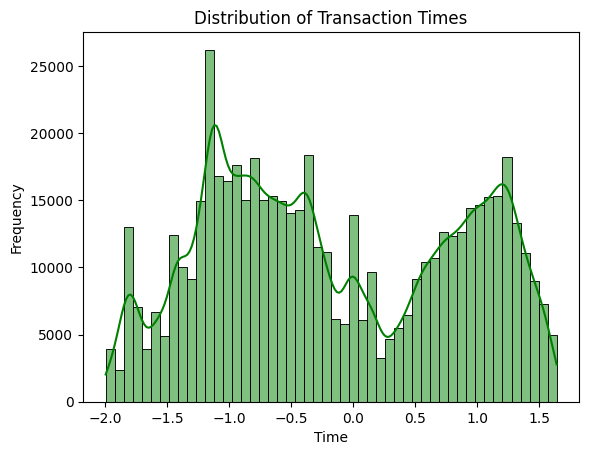

In [21]:
import seaborn as sns

# Trancation amount vs Class
sns.histplot(df['Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'Time' feature
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

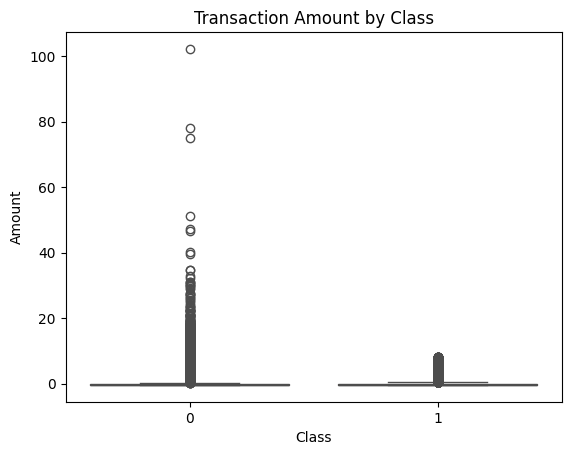

In [22]:
# Boxplot to compare Amount for fraud and non-fraud
sns.boxplot(x='Class', y='Amount', data=df, color='orange')
plt.title('Transaction Amount by Class')
plt.show()

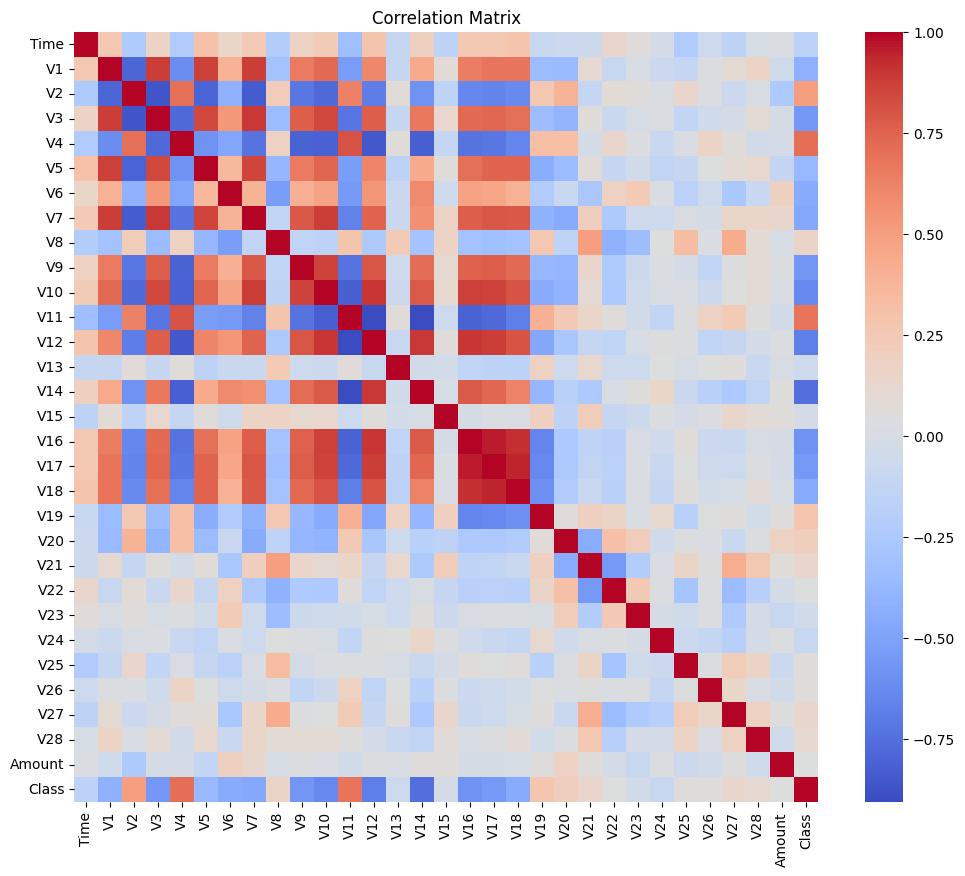

In [23]:
# Correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Correlations with the target variable
correlations_with_class = corr['Class'].sort_values(ascending=False)
print("Correlations with Class:\n", correlations_with_class)


Correlations with Class:
 Class     1.000000
V4        0.705781
V11       0.687445
V2        0.496279
V19       0.271526
V20       0.208400
V8        0.153030
V21       0.139288
V27       0.132559
V28       0.108698
V25       0.063118
V26       0.055574
V22       0.045173
Amount    0.041250
V15      -0.018715
V23      -0.035542
V13      -0.056470
V24      -0.098474
Time     -0.163911
V5       -0.366287
V1       -0.412522
V18      -0.453525
V6       -0.455685
V7       -0.469915
V17      -0.550592
V3       -0.556197
V9       -0.568857
V16      -0.585902
V10      -0.635053
V12      -0.677881
V14      -0.752460
Name: Class, dtype: float64


* Compare Feature Distributions: Visualize how individual features differ for fraud and non-fraud

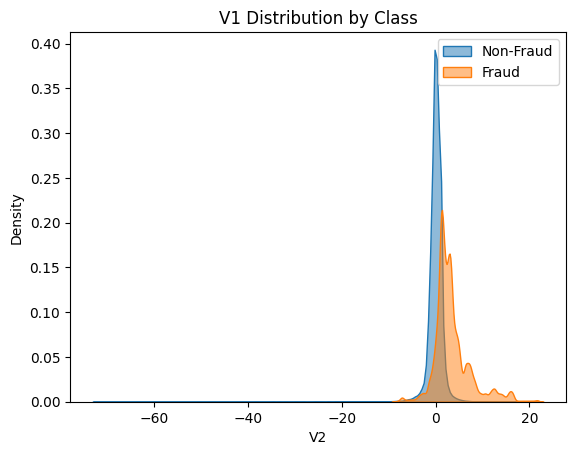

In [25]:
sns.kdeplot(data=df[df['Class'] == 0], x='V2', label='Non-Fraud', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['Class'] == 1], x='V2', label='Fraud', fill=True, alpha=0.5)
plt.title('V1 Distribution by Class')
plt.legend()
plt.show()


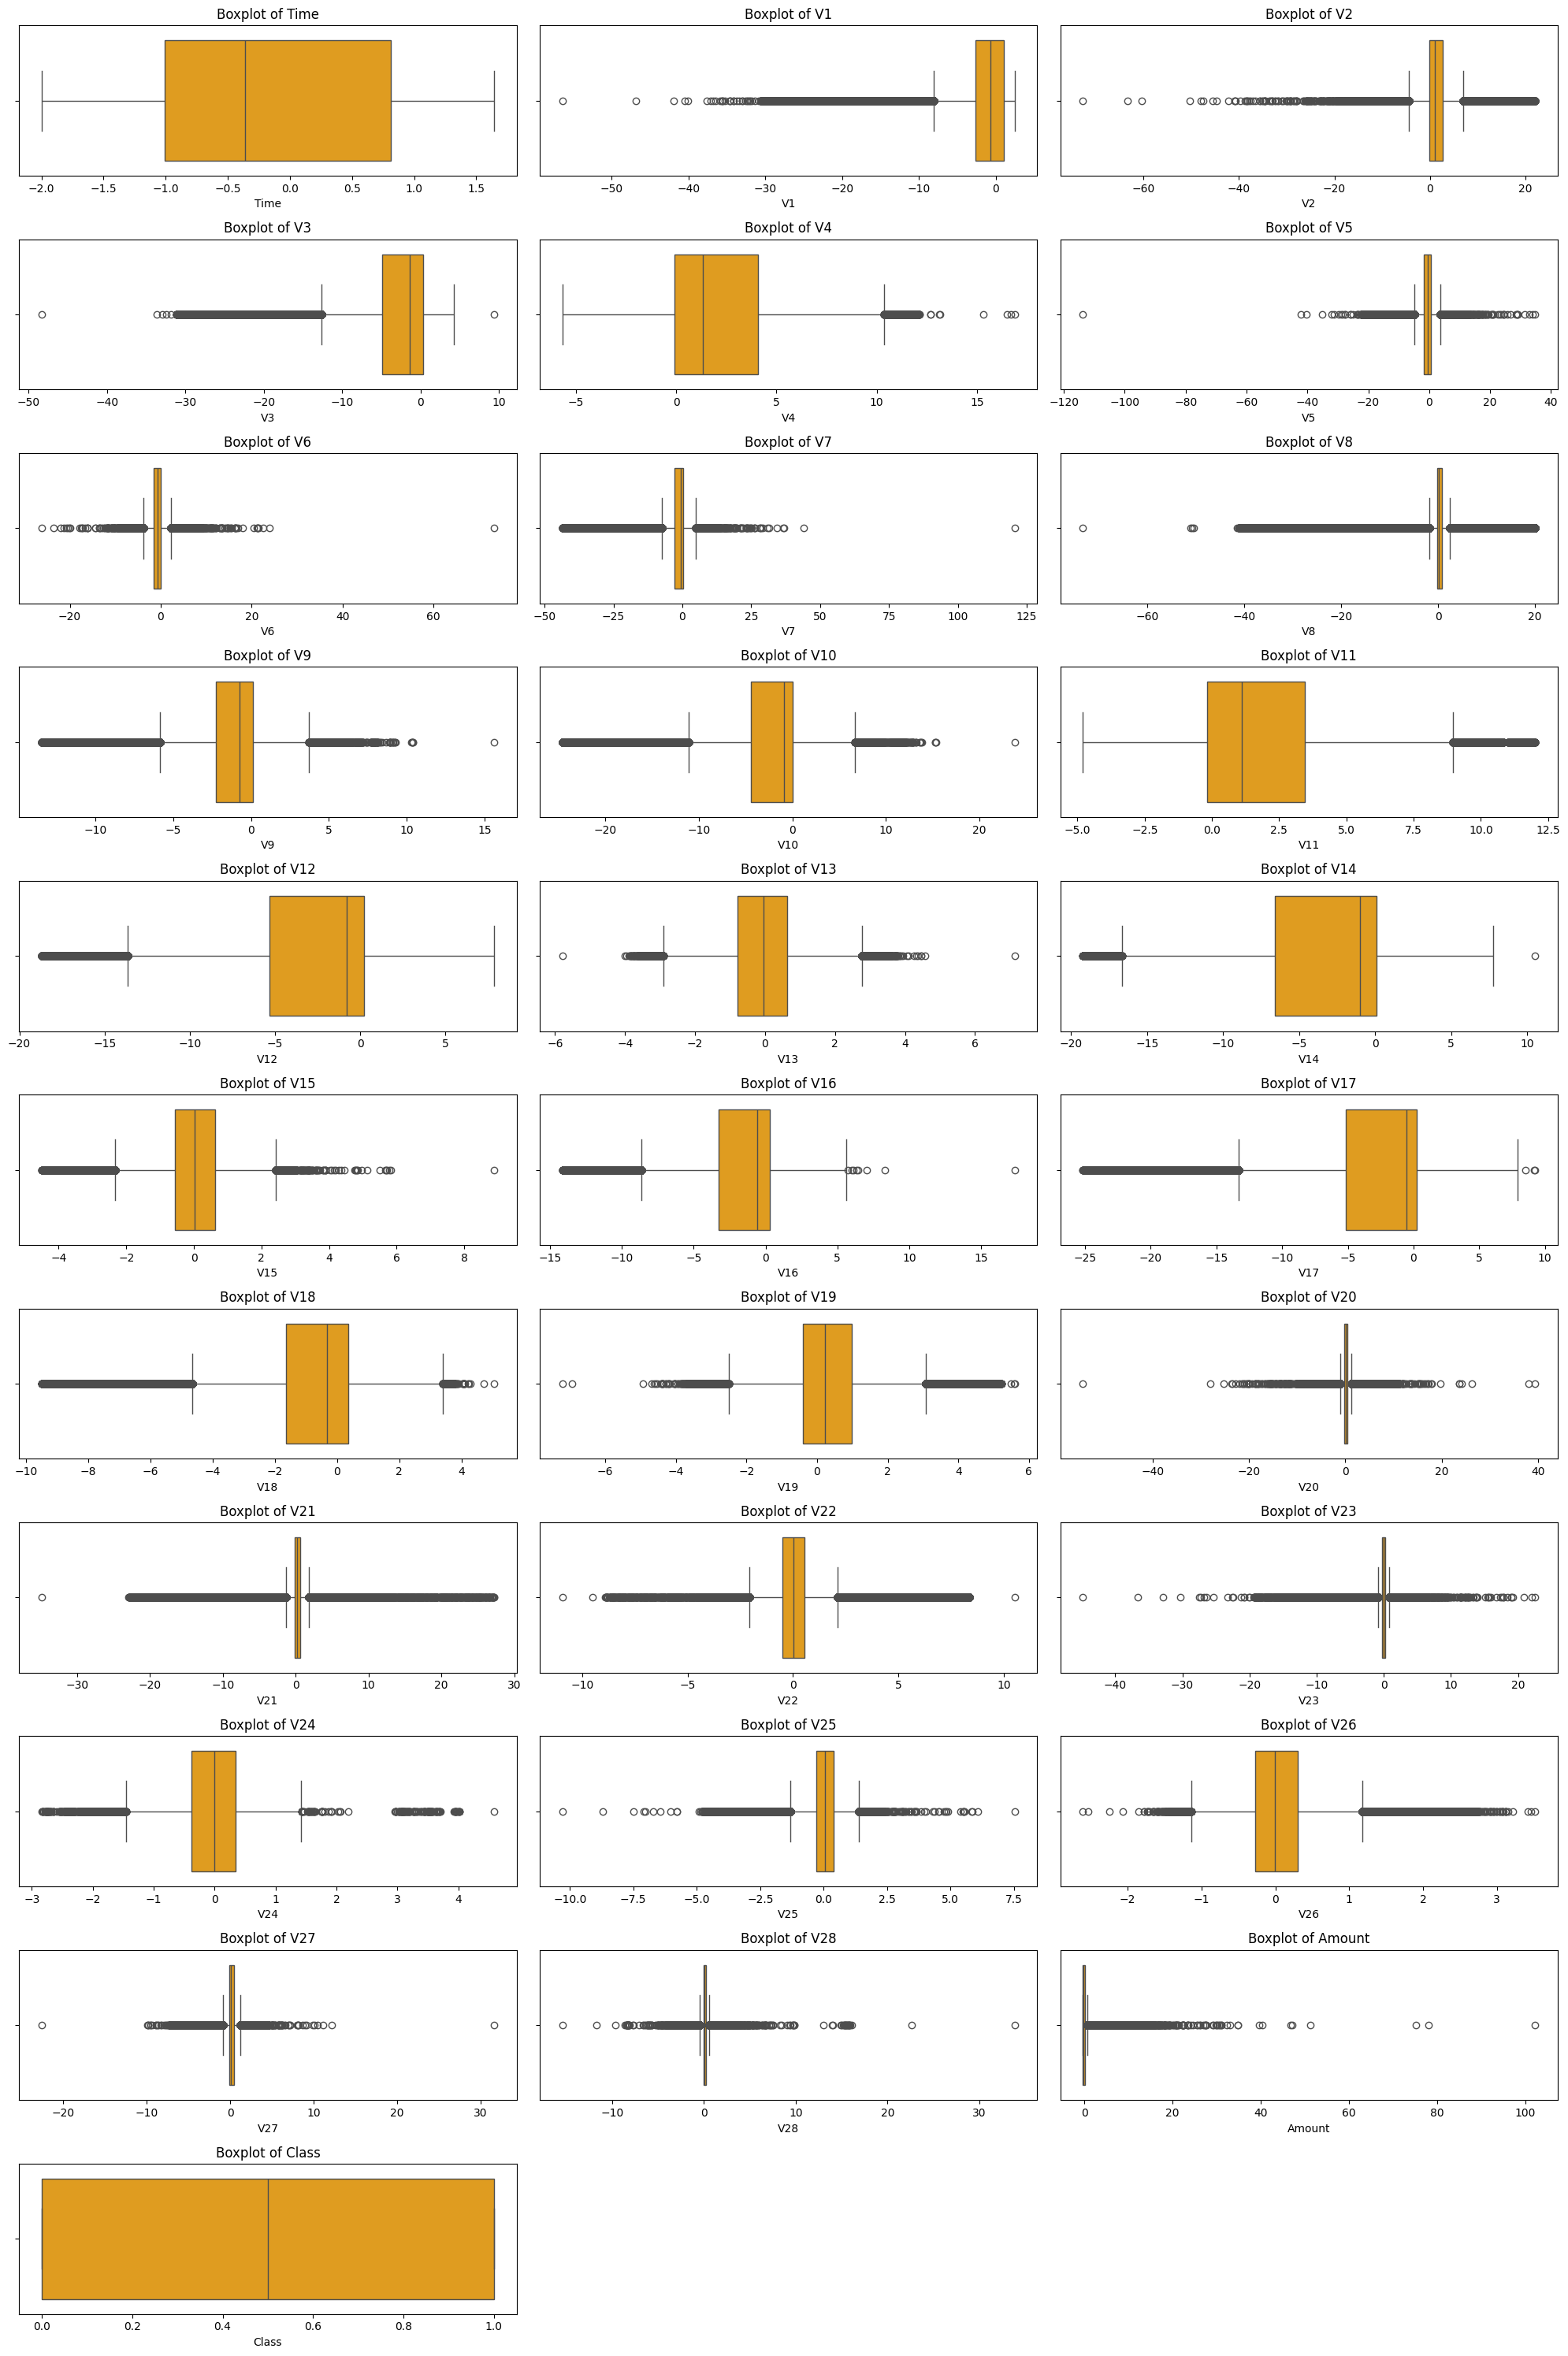

In [26]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns, 1):
    plt.subplot((len(df.columns) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()  # Prevent overlapping of subplots

plt.show()

## Model and Training

### Without SMOTE

In [27]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [28]:
# without SMOTE
from sklearn.model_selection import train_test_split 

X = data.drop('Class', axis=1) 
y = data['Class']

X.shape, y.shape

((283726, 30), (283726,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)

lg_pred = lg_model.predict(X_test)

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

### With SMOTE

In [32]:
# With SMOTE
X_smote = df.drop('Class', axis=1)
y_smote = df['Class']

X_smote.shape, y_smote.shape

((566506, 30), (566506,))

In [33]:
# With SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train_smote, y_train_smote)

lg_pred_smote = lg_model.predict(X_test_smote)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

rf_pred_smote = rf_model.predict(X_test_smote)

##  Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
import seaborn as sns
def evaluate_model(y_test, y_pred):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion_mat}")
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

Logistic Regression without SMOTE
Confusion Matrix:
[[56650     6]
 [   42    48]]
Accuracy: 0.9991541254009093
Precision: 0.8888888888888888
Recall: 0.5333333333333333
F1 Score: 0.6666666666666666


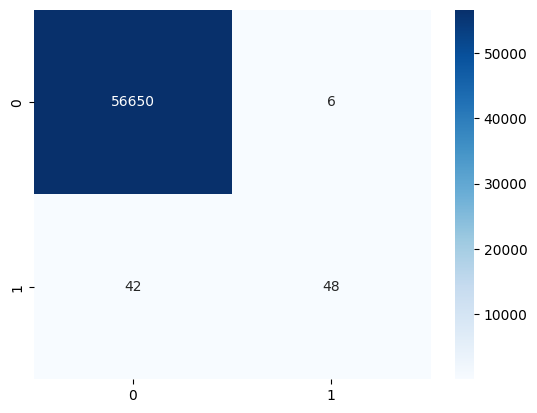

In [52]:
print("Logistic Regression without SMOTE")
evaluate_model(y_test, lg_pred)


Logistic Regression with SMOTE
Confusion Matrix:
[[54996  1467]
 [ 4735 52104]]
Accuracy: 0.9452613369578649
Precision: 0.9726157809262475
Recall: 0.9166945231267264
F1 Score: 0.9438275518521873


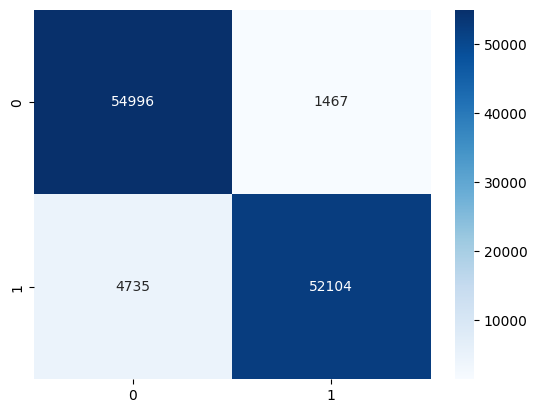

In [51]:
print("\nLogistic Regression with SMOTE")
evaluate_model(y_test_smote, lg_pred_smote)

In [38]:
print("\nRandom Forest without SMOTE")
evaluate_model(y_test, rf_pred)
print("\nRandom Forest with SMOTE")
evaluate_model(y_test_smote, rf_pred_smote)


Random Forest without SMOTE
Confusion Matrix:
[[56654     2]
 [   24    66]]
Accuracy: 0.9995418179254926
Precision: 0.9705882352941176
Recall: 0.7333333333333333
F1 Score: 0.8354430379746836

Random Forest with SMOTE
Confusion Matrix:
[[56452    11]
 [    0 56839]]
Accuracy: 0.9999029143351397
Precision: 0.999806508355321
Recall: 1.0
F1 Score: 0.9999032448170008


## Saving Model

In [39]:
# import joblib

# joblib.dump(lg_model, '../models/logistic_regression_model.pkl')
# joblib.dump(rf_model, '../models/random_forest_model.pkl')

In [40]:
# model = joblib.load('../models/random_forest_model.pkl')

# pred = model.predict(X_test)

In [41]:
# pred[:]